In [1]:
%pylab inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def generateOUprocess(T=10000.0, tau=3.0, mu=0.0, sigma=1.0, dt=0.1):
    """Function to generate OU process from an input excitation time, here just set as 
    100000 ms as in the paper by Pozzorini"""
    
    T_in = int(T/dt) #getting the excitation time in terms of an integer
    
    white_noise = np.random.randn(T_in)
      
    OU_process = np.zeros(T_in)
    
    OU_c1 = dt/tau # convenient constants
    OU_c2 = np.sqrt(2.0*dt/tau)
    
    for t in range(T_in-1):
        OU_process[t+1] = OU_process[t] + (mu - OU_process[t])*OU_c1 + sigma*OU_c2*white_noise[t] 
        
    I = OU_process*sigma + mu
    
    return I

(0, 1000)

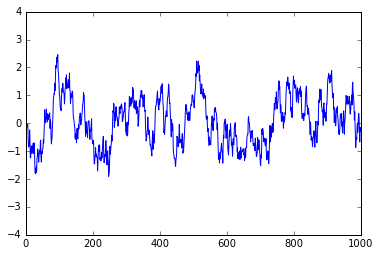

In [3]:
plt.plot(generateOUprocess(mu=0))
plt.xlim(0,1000)

In [4]:
generateOUprocess(mu=4).mean()

7.9963417558004721

In [5]:
generateOUprocess(sigma=2).std()

4.0487825601016114

- __mean and standard deviation do not match. Please correct!__

# For now, lets take a working version....

In [6]:
def OU_current(T,I_0=0,sigma=1,tau=0.003, DeltaT=1/20000.):
    '''
    T : gives the simulation time in seconds
    other parameters as in Pozzorini et al 2015
    '''
    def DeltaI(I):
        return (I_0-I)*DeltaT/tau + sqrt(2*sigma**2*DeltaT/tau)*randn()
    
    I = zeros(int(T/DeltaT))
    I[0] = I_0 #set the initial value to the mean input
    
    for i in xrange(1,len(I)):
        I[i] = I[i-1]+DeltaI(I[i-1])
        
    return I

9.88915265954 1.95102071158


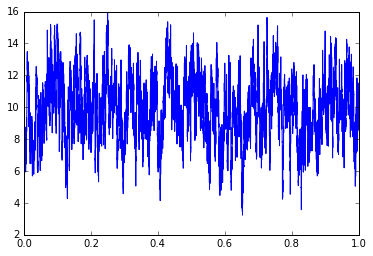

In [7]:
T=1; dt = 1/20000.
I = OU_current(T=1, I_0=10, sigma=2, DeltaT=dt)
plot(linspace(0,T,1/dt),I)
print I.mean(), I.std() #okay

Looking at `Neuro-Analysis-Course/Ex1P1.ipynb` $I_0\approx400pA$ should result in a firing rate near 10 Hz. Lets choose $\sigma=100pA$ for now


In [8]:
I = OU_current(T=10, I_0=400, sigma=100, DeltaT=1/20000.) #in bb

Export stimulation current to TPL file (patchmaster)
>Template Files for stimulation can be used in Voltage Clamp and in Current Clamp mode. In Current Clamp
mode, the stimulation data is defined in volts, where 1 mV corresponds with 1 pA current injection.
Example: A value of 0.1 would result in a current injection of 100 pA.

In [9]:
# store the values in Ampere to binary file (probably not enough precision)
#convert to mV
I_mV = 1e-3*I

# store the values in pA to a binary file
(I_mV).astype('f4').tofile('I_noise_test_10s.tpl')